In [2]:
import keras as K
import keras.backend as Ke
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model,Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional,Flatten
from keras.layers import Layer
from keras.models import Sequential
#moved to tensorflow=addons
from keras_contrib.layers import CRF
from pathlib import Path
#import tensorflow_addons as tfa
import tensorflow as tf
import os
import numpy as np

import pandas as pd
import pandas as pd
import nltk

In [4]:
data = pd.read_csv('task2.csv')
print(data)
print(data["text"])
import nltk

sent_tokens = data.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)

print(sent_tokens)

      Sentence #                                               text  \
0              1  Judging from previous posts this used to be a ...   
1              2  We, there were four of us, arrived at noon - t...   
2              3  They never brought us complimentary noodles, i...   
3              4  The food was lousy - too sweet or too salty an...   
4              5  After all that, they complained to me about th...   
...          ...                                                ...   
1703        1996  I can't believe that it was, but please put th...   
1704        1997  The waitress came to check in on us every few ...   
1705        1998  I couldn't ignore the fact that she reach over...   
1706        1999  She then put the check down without asking if ...   
1707        2000  I wish I could like this place more, and I wis...   

     aspect_term aspect_category            category  
0     RESTAURANT         GENERAL  RESTAURANT#GENERAL  
1        SERVICE         GENERAL     

In [5]:
import itertools

doc_complete = list(itertools.chain.from_iterable(list(sent_tokens)))


doc_complete = []
for sentence in list(sent_tokens):
    print(sentence)
    doc_complete.append(sentence[0])
print(doc_complete)
print(len(doc_complete))

['Judging from previous posts this used to be a good place, but not any longer.']
['We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude.']
['They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table.']
['The food was lousy - too sweet or too salty and the portions tiny.']
['After all that, they complained to me about the small tip.']
['Avoid this place!']
['I have eaten at Saul, many times, the food is always consistently, outrageously good.']
['Saul is the best restaurant on Smith Street and in Brooklyn.']
['The duck confit is always amazing and the foie gras terrine with figs was out of this world.']
['The wine list is interesting and has many good values.']
['For the price, you cannot eat this well in Manhattan.']
['I was very disappointed with this restaurant.']
['Ive asked a cart attendant for a lotus leaf wrapped rice and she replied b

In [9]:
import string
from nltk.stem import WordNetLemmatizer 
import gensim
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
lemmatizer = WordNetLemmatizer()

In [10]:
stop = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours',
         'yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself',
         'they','the','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these',
         'those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing',
         'a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
         'between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off',
         'over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each',
         'few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just',
         'don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren']

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    lemmatized = ''.join(lemmatizer.lemmatize(word) for word in stop_free)
    stemmed = ''.join(ps.stem(lemma) for lemma in lemmatized)

    return stemmed

In [11]:
sentences = [clean(doc) for doc in doc_complete]
print(len(sentences))
print(data)


data_clean = [clean(doc).split() for doc in doc_complete]


print(data_clean)
import itertools

words = list(itertools.chain.from_iterable(data_clean))

print(words)

1708
      Sentence #                                               text  \
0              1  Judging from previous posts this used to be a ...   
1              2  We, there were four of us, arrived at noon - t...   
2              3  They never brought us complimentary noodles, i...   
3              4  The food was lousy - too sweet or too salty an...   
4              5  After all that, they complained to me about th...   
...          ...                                                ...   
1703        1996  I can't believe that it was, but please put th...   
1704        1997  The waitress came to check in on us every few ...   
1705        1998  I couldn't ignore the fact that she reach over...   
1706        1999  She then put the check down without asking if ...   
1707        2000  I wish I could like this place more, and I wis...   

     aspect_term aspect_category            category  
0     RESTAURANT         GENERAL  RESTAURANT#GENERAL  
1        SERVICE         GENERAL

In [12]:
token_list = words
print(len(token_list))
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(token_list)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(sentences)
print(len(encoded_docs))
# pad documents to a max length of 4 words
max_len = 75
max_length = max_len
X = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#X = np.expand_dims(X, axis = 0)
data["category"] = data["category"].astype('category')

data["category_cat"] = data["category"].cat.codes
y = data["category_cat"]

11647
1708


In [13]:
print(y)
print(X)

0        8
1       11
2       11
3        5
4       11
        ..
1703    11
1704    11
1705    11
1706    11
1707     8
Name: category_cat, Length: 1708, dtype: int8
[[1351  681 1352 ...    0    0    0]
 [ 684  211   26 ...    0    0    0]
 [  15  543   26 ...    0    0    0]
 ...
 [ 621 1350  379 ...    0    0    0]
 [ 447  315  220 ...    0    0    0]
 [ 259  110    9 ...    0    0    0]]


In [14]:
from tqdm import tqdm
import os
import numpy as np

#glove_path = Path.

embeddings_index = {}
with open(os.path.join(os.getcwd(), 'glove.6B.300d.txt'), encoding='utf8') as f:
    for i, line in tqdm(enumerate(f)):
        values = line.split()
        word = ''.join(values[:-300])
        coefs = np.asarray(values[-300:], dtype='float32')
        embeddings_index[word] = coefs


data_train = pd.read_csv('train.csv')
data_test =  pd.read_csv('test.csv')

print(data_train.tail())
print(data_test.tail())

400000it [00:31, 12876.27it/s]

       Sentence #     Word Tag
28641        2000    would   O
28642        2000  retrain   O
28643        2000      the   O
28644        2000    staff   B
28645        2000        .   O
      Sentence #  Word Tag
9864         676   was   O
9865         676  good   O
9866         676     ,   O
9867         676   too   O
9868         676     .   O


In [15]:
word_train = set(data_train['Word'].values)
word_test = set(data_test['Word'].values)
#or in-order to take a union of the two sets
words = list(word_train or word_test)


print(words)

['affordable', 'uni', 'nonetheless--great', 'luck', 'conveniently', 'teeth', 'sanity', 'pre-theater', 'fluffy', 'foie', 'bargain', 'couple', 'ceviche', '9/10', 'actually', 'been', 'skip', 'various', 'still', 'types', 'cambridge', 'tremendously', 'bistro', 'pork', 'edge', 'restaurant"', 'organized', 'another', 'repulsive', 'conversation', 'casimir', 'opera', 'none', 'type', 'point', 'way', 'frendly', 'minute', "could've", 'off', 'mid', 'vegatables', 'notorious', 'prime', 'accidentally', 'celebrated', 'gem:', 'curiousity', 'memorable', 'rabbit', 'slope', '"oh', 'overpack', 'go-to', 'fiance', 'broke', 'stick', 'shine', 'impecible', 'shanty', 'foot', 'hope', 'clientele', 'grammercy', 'wipe', 'sausages', 'occupied', 'skin', 'hudson', 'students', 'son', 'yuka', 'mains', 'agreed', 'elegant', 'customer', 'didnt', 'dancing', 'out"', 'be', 'ofr', "d'", 'seasonal', 'bit', 'board', 'hype', 'buttery', 'exactly', 'pineapple', 'summer', 'lit', 'you’re', 'parmesean', 'gem', 'accompaniment', 'course', 

In [16]:
word_true = 0
for word in words:
    if word in embeddings_index:
        word_true += 1


print(len(words))
print(word_true)

3599
3142


In [17]:
word2idx = {}
#FOR PADDING SHORT SENTENCES
word2idx['<PAD>'] = 0
#REPLACE RARE OR UNKNOWN WORDS IN VOCABULARY 
word2idx['<UNK>'] = 1
#PLUS TWO FOR PADDING AND UNKNOWN WORD ALREADY INDEXED
for i, word in enumerate(words):
    word2idx[word] = i + 2



print(word2idx)

print(word2idx['judging'])

{'<PAD>': 0, '<UNK>': 1, 'affordable': 2, 'uni': 3, 'nonetheless--great': 4, 'luck': 5, 'conveniently': 6, 'teeth': 7, 'sanity': 8, 'pre-theater': 9, 'fluffy': 10, 'foie': 11, 'bargain': 12, 'couple': 13, 'ceviche': 14, '9/10': 15, 'actually': 16, 'been': 17, 'skip': 18, 'various': 19, 'still': 20, 'types': 21, 'cambridge': 22, 'tremendously': 23, 'bistro': 24, 'pork': 25, 'edge': 26, 'restaurant"': 27, 'organized': 28, 'another': 29, 'repulsive': 30, 'conversation': 31, 'casimir': 32, 'opera': 33, 'none': 34, 'type': 35, 'point': 36, 'way': 37, 'frendly': 38, 'minute': 39, "could've": 40, 'off': 41, 'mid': 42, 'vegatables': 43, 'notorious': 44, 'prime': 45, 'accidentally': 46, 'celebrated': 47, 'gem:': 48, 'curiousity': 49, 'memorable': 50, 'rabbit': 51, 'slope': 52, '"oh': 53, 'overpack': 54, 'go-to': 55, 'fiance': 56, 'broke': 57, 'stick': 58, 'shine': 59, 'impecible': 60, 'shanty': 61, 'foot': 62, 'hope': 63, 'clientele': 64, 'grammercy': 65, 'wipe': 66, 'sausages': 67, 'occupied':

In [18]:
#SETING THE EMBEDDING DIMENSION TO 300
EMBEDDING_DIM = 300
#each word will be represented by a array of 300 values
#therefore we are declaring a len(words)+2 X 300 dimensions

embedding_matrix = np.zeros((len(words)+2, EMBEDDING_DIM))
"""
for all the words indexed in our dictionary we get the embedding value from
the glove embedding and save it in the embedding matrix as it's vector representation'
if the vector is not present we tag the word as the unknown/rare word since it is
not present in the embedding .

print(['AMBIENCE#GENERAL','DRINKS#PRICES','DRINKS#QUALITY','DRINKS#STYLE_OPTIONS','FOOD#PRICES','FOOD#QUALITY','FOOD#STYLE_OPTIONS','LOCATION#GENERAL','RESTAURANT#GENERAL','RESTAURANT#MISCELLANEOUS','RESTAURANT#PRICES','SERVICE#GENERAL'])

"""

"\nfor all the words indexed in our dictionary we get the embedding value from\nthe glove embedding and save it in the embedding matrix as it's vector representation'\nif the vector is not present we tag the word as the unknown/rare word since it is\nnot present in the embedding .\n\nprint(['AMBIENCE#GENERAL','DRINKS#PRICES','DRINKS#QUALITY','DRINKS#STYLE_OPTIONS','FOOD#PRICES','FOOD#QUALITY','FOOD#STYLE_OPTIONS','LOCATION#GENERAL','RESTAURANT#GENERAL','RESTAURANT#MISCELLANEOUS','RESTAURANT#PRICES','SERVICE#GENERAL'])\n\n"

In [19]:
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is None:
        embedding_matrix[i] = embeddings_index['unk']
    else:
        embedding_matrix[i] = embedding_vector

# embedding_matrix[0] is all zeros for padding
embedding_matrix[0] = np.zeros(EMBEDDING_DIM)

print(embedding_matrix.shape)
print('unk' in embeddings_index)

print(len(word2idx))

(3601, 300)
True
3601


In [20]:
max_len = 75
n_words = len(word2idx)

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=Ke.squeeze(Ke.tanh(Ke.dot(x,self.W)+self.b),axis=-1)
        at=Ke.softmax(et)
        at=Ke.expand_dims(at,axis=-1)
        output=x*at
        return Ke.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [21]:
input = Input(shape=(max_len,))
model = Embedding(n_words,300,weights=[embedding_matrix],input_length=max_len,mask_zero=True)(input)
model =  Bidirectional (LSTM (256,return_sequences=True,dropout=0.50))(model)
model = TimeDistributed(Dense(50,activation='relu'))(model)
model=attention()(model)
model = Flatten()(model)
model = Dense(100,activation='relu')(model)

output = Dense(12,activation='softmax')(model)
model = Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 75, 300)           1080300   
_________________________________________________________________
bidirectional (Bidirectional (None, 75, 512)           1140736   
_________________________________________________________________
time_distributed (TimeDistri (None, 75, 50)            25650     
_________________________________________________________________
attention (attention)        (None, 50)                125       
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100  

In [22]:
y = np.array(y)
print(len(y))
print(len(X))

1708
1708


In [23]:
history = model.fit(X,y, batch_size=32, epochs=8,
                    validation_split=0.1, verbose=1)


hist = pd.DataFrame(history.history)

Epoch 1/8
49/49 [==============================] - 23s 372ms/step - loss: 2.2880 - accuracy: 0.3172 - val_loss: 1.8280 - val_accuracy: 0.2515
Epoch 2/8
49/49 [==============================] - 17s 346ms/step - loss: 1.8991 - accuracy: 0.3427 - val_loss: 1.7302 - val_accuracy: 0.3333
Epoch 3/8
49/49 [==============================] - 17s 348ms/step - loss: 1.7114 - accuracy: 0.4048 - val_loss: 1.7248 - val_accuracy: 0.3860
Epoch 4/8
49/49 [==============================] - 18s 374ms/step - loss: 1.5907 - accuracy: 0.4531 - val_loss: 1.5792 - val_accuracy: 0.5263
Epoch 5/8
49/49 [==============================] - 19s 383ms/step - loss: 1.3110 - accuracy: 0.5857 - val_loss: 1.5370 - val_accuracy: 0.5205
Epoch 6/8
49/49 [==============================] - 19s 384ms/step - loss: 1.1925 - accuracy: 0.6212 - val_loss: 1.5527 - val_accuracy: 0.5731
Epoch 7/8
49/49 [==============================] - 19s 386ms/step - loss: 0.9858 - accuracy: 0.6843 - val_loss: 1.7028 - val_accuracy: 0.5263
Epoch 

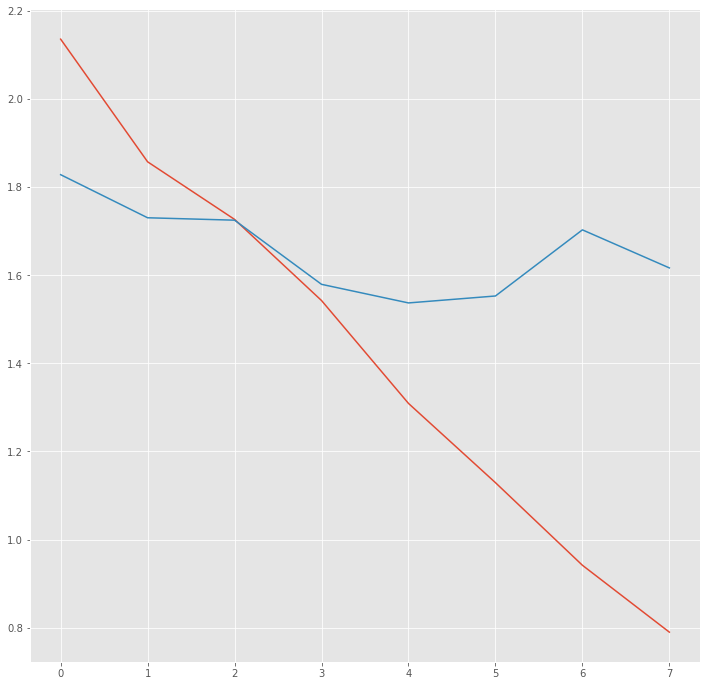

54/54 - 7s - loss: 0.7150 - accuracy: 0.7869
Accuracy: 78.688526


In [24]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.show()
loss, accuracy = model.evaluate(X, y, verbose=2)
print('Accuracy: %f' % (accuracy*100))

In [25]:
data = pd.read_csv('task2.csv')
print(data)
print(data["text"])
import nltk

sent_tokens = data.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)

print(sent_tokens)

#Merging into a single document for data cleaning

import itertools

doc_complete = list(itertools.chain.from_iterable(list(sent_tokens)))


      Sentence #                                               text  \
0              1  Judging from previous posts this used to be a ...   
1              2  We, there were four of us, arrived at noon - t...   
2              3  They never brought us complimentary noodles, i...   
3              4  The food was lousy - too sweet or too salty an...   
4              5  After all that, they complained to me about th...   
...          ...                                                ...   
1703        1996  I can't believe that it was, but please put th...   
1704        1997  The waitress came to check in on us every few ...   
1705        1998  I couldn't ignore the fact that she reach over...   
1706        1999  She then put the check down without asking if ...   
1707        2000  I wish I could like this place more, and I wis...   

     aspect_term aspect_category            category  
0     RESTAURANT         GENERAL  RESTAURANT#GENERAL  
1        SERVICE         GENERAL     

In [26]:
doc_complete = []
for sentence in list(sent_tokens):
    print(sentence)
    doc_complete.append(sentence[0])
print(doc_complete)
print(len(doc_complete))

import string
from nltk.stem import WordNetLemmatizer 
import gensim
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
lemmatizer = WordNetLemmatizer()

['Judging from previous posts this used to be a good place, but not any longer.']
['We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude.']
['They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table.']
['The food was lousy - too sweet or too salty and the portions tiny.']
['After all that, they complained to me about the small tip.']
['Avoid this place!']
['I have eaten at Saul, many times, the food is always consistently, outrageously good.']
['Saul is the best restaurant on Smith Street and in Brooklyn.']
['The duck confit is always amazing and the foie gras terrine with figs was out of this world.']
['The wine list is interesting and has many good values.']
['For the price, you cannot eat this well in Manhattan.']
['I was very disappointed with this restaurant.']
['Ive asked a cart attendant for a lotus leaf wrapped rice and she replied b

In [27]:
stop = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours',
         'yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself',
         'they','the','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these',
         'those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing',
         'a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
         'between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off',
         'over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each',
         'few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just',
         'don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren']

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    lemmatized = ''.join(lemmatizer.lemmatize(word) for word in stop_free)
    stemmed = ''.join(ps.stem(lemma) for lemma in lemmatized)

    return stemmed

sentences = [clean(doc) for doc in doc_complete]
print(len(sentences))
print(data)

1708
      Sentence #                                               text  \
0              1  Judging from previous posts this used to be a ...   
1              2  We, there were four of us, arrived at noon - t...   
2              3  They never brought us complimentary noodles, i...   
3              4  The food was lousy - too sweet or too salty an...   
4              5  After all that, they complained to me about th...   
...          ...                                                ...   
1703        1996  I can't believe that it was, but please put th...   
1704        1997  The waitress came to check in on us every few ...   
1705        1998  I couldn't ignore the fact that she reach over...   
1706        1999  She then put the check down without asking if ...   
1707        2000  I wish I could like this place more, and I wis...   

     aspect_term aspect_category            category  
0     RESTAURANT         GENERAL  RESTAURANT#GENERAL  
1        SERVICE         GENERAL

In [28]:
data_clean = [clean(doc).split() for doc in doc_complete]


print(data_clean)
import itertools

words = list(itertools.chain.from_iterable(data_clean))

print(words)

[['judging', 'previous', 'posts', 'used', 'good', 'place,', 'not', 'longer.'], ['we,', 'four', 'us,', 'arrived', 'noon', '-', 'place', 'empty', '-', 'staff', 'acted', 'like', 'imposing', 'rude.'], ['never', 'brought', 'us', 'complimentary', 'noodles,', 'ignored', 'repeated', 'requests', 'sugar,', 'threw', 'dishes', 'table.'], ['food', 'lousy', '-', 'sweet', 'salty', 'portions', 'tiny.'], ['that,', 'complained', 'small', 'tip.'], ['avoid', 'place!'], ['eaten', 'saul,', 'many', 'times,', 'food', 'always', 'consistently,', 'outrageously', 'good.'], ['saul', 'best', 'restaurant', 'smith', 'street', 'brooklyn.'], ['duck', 'confit', 'always', 'amazing', 'foie', 'gras', 'terrine', 'figs', 'world.'], ['wine', 'list', 'interesting', 'many', 'good', 'values.'], ['price,', 'cannot', 'eat', 'well', 'manhattan.'], ['disappointed', 'restaurant.'], ['ive', 'asked', 'cart', 'attendant', 'lotus', 'leaf', 'wrapped', 'rice', 'replied', 'back', 'rice', 'walked', 'away.'], ['ask', 'three', 'times', 'finall

In [29]:
token_list = words
print(len(token_list))
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(token_list)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(sentences)
print(len(encoded_docs))
# pad documents to a max length of 4 words
max_len = 75
max_length = max_len
X = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#X = np.expand_dims(X, axis = 0)
data["category"] = data["category"].astype('category')

data["category_cat"] = data["category"].cat.codes
y = data["category_cat"]





print(y)
print(X)

11647
1708
0        8
1       11
2       11
3        5
4       11
        ..
1703    11
1704    11
1705    11
1706    11
1707     8
Name: category_cat, Length: 1708, dtype: int8
[[1351  681 1352 ...    0    0    0]
 [ 684  211   26 ...    0    0    0]
 [  15  543   26 ...    0    0    0]
 ...
 [ 621 1350  379 ...    0    0    0]
 [ 447  315  220 ...    0    0    0]
 [ 259  110    9 ...    0    0    0]]


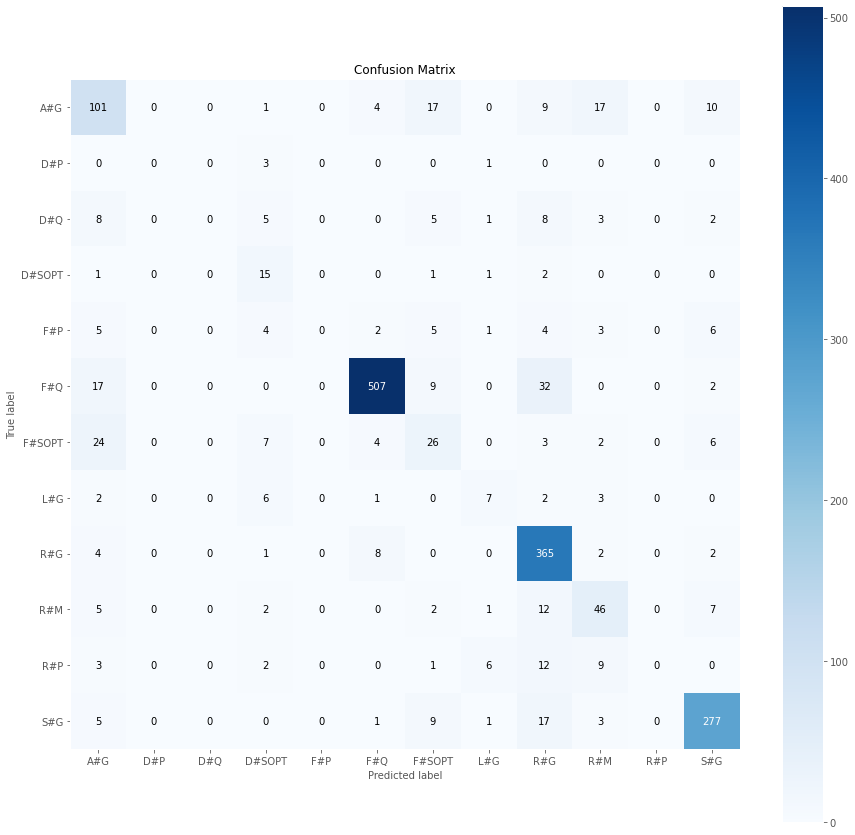

['AMBIENCE#GENERAL', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE_OPTIONS', 'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE_OPTIONS', 'LOCATION#GENERAL', 'RESTAURANT#GENERAL', 'RESTAURANT#MISCELLANEOUS', 'RESTAURANT#PRICES', 'SERVICE#GENERAL']


TypeError: Cannot broadcast np.ndarray with operand of type <class 'list'>

In [31]:
import scikitplot as skplt
p_all = model.predict(X)

skplt.metrics.plot_confusion_matrix(y, np.argmax(p_all, axis = 1),figsize=(15,15))

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])

plt.show()

print(['AMBIENCE#GENERAL','DRINKS#PRICES','DRINKS#QUALITY','DRINKS#STYLE_OPTIONS','FOOD#PRICES','FOOD#QUALITY','FOOD#STYLE_OPTIONS','LOCATION#GENERAL','RESTAURANT#GENERAL','RESTAURANT#MISCELLANEOUS','RESTAURANT#PRICES','SERVICE#GENERAL'])
target_names=[0,1,2,3,4,5,6,7,8,9,10,11]
target_names=list(map(str,target_names))
#print(classification_report(t, p, target_names=target_names))
from seqeval.metrics import f1_score, classification_report
#print(f1_score(y, p_all))
print(classification_report(y, np.argmax(p_all,axis=1)))  

print(len(p_all))
print(len(y))
print(len(X))

              precision    recall  f1-score   support

           0       0.58      0.64      0.60       159
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        32
           3       0.33      0.75      0.45        20
           4       0.00      0.00      0.00        30
           5       0.96      0.89      0.93       567
           6       0.35      0.36      0.35        72
           7       0.37      0.33      0.35        21
           8       0.78      0.96      0.86       382
           9       0.52      0.61      0.56        75
          10       0.00      0.00      0.00        33
          11       0.89      0.88      0.89       313

    accuracy                           0.79      1708
   macro avg       0.40      0.45      0.42      1708
weighted avg       0.76      0.79      0.77      1708



c:\users\nikhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nikhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nikhi\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

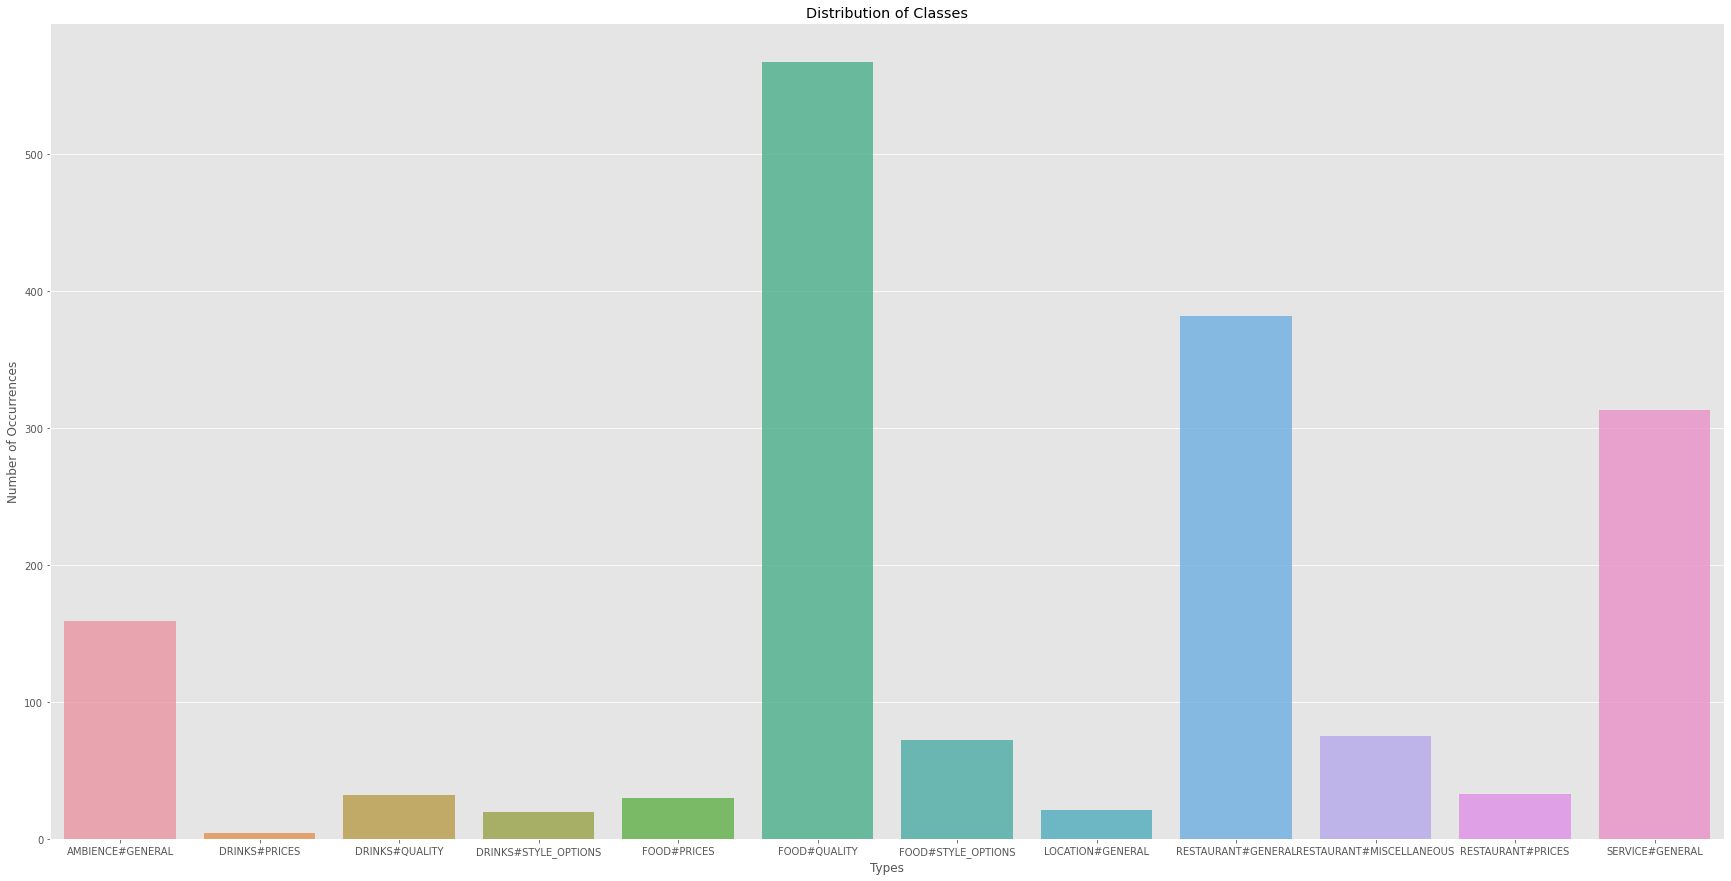

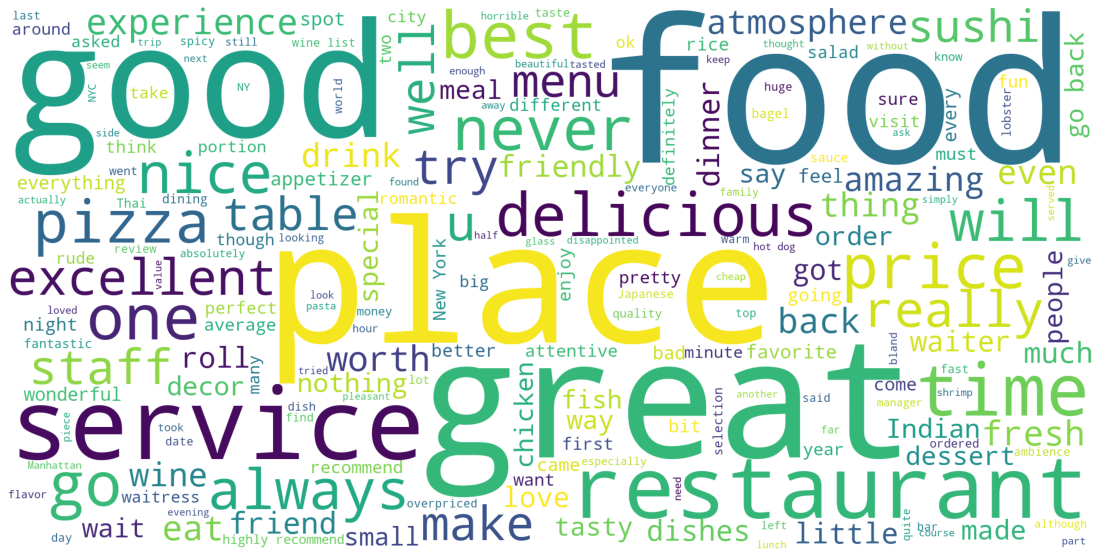

In [33]:
from sklearn.metrics import f1_score,classification_report
f1_score(y, np.argmax(p_all,axis=1), average='macro')
print(classification_report(y, np.argmax(p_all,axis=1), labels=[0,1, 2, 3,4,5,6,7,8,9,10,11]))

import seaborn as sns

cnt_types = data['category'].value_counts()

plt.figure(figsize=(30,15))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.title('Distribution of Classes',)
plt.show()


#Creating a wordcloud using all the posts

import matplotlib.pyplot as plt
from wordcloud import WordCloud


plt.figure(figsize=(20,10))

wordCloud = WordCloud(background_color="white",width=2000,height=1000,mode="RGB").generate(''.join(data["text"]))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()